# Mathematical Underpinnings - Lab 10

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import scale

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import Lasso

## Task 1

In [5]:
df = pd.read_csv('prostate.data', sep="\t", index_col=0)

In [6]:
X = np.array(df.iloc[:, 0:8])
Y = np.array(df.iloc[:, 8])

In [7]:
X = scale(X)
Y = scale(Y)

### a)

In [16]:
mod_lars = Lars(fit_intercept=False)
mod_lars.fit(X, Y)
# fit

Lars(fit_intercept=False)

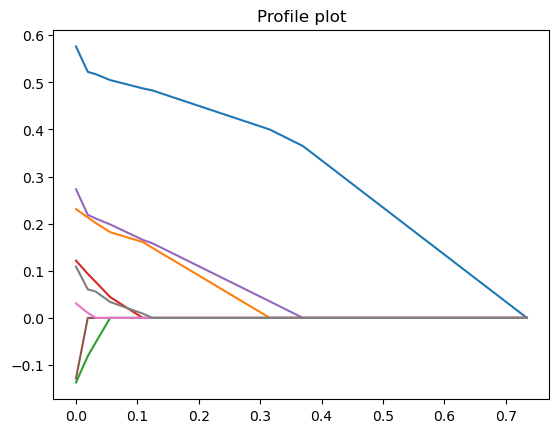

In [39]:
# plot
for i in range(len(mod_lars.coef_)):
    plt.plot(mod_lars.alphas_, mod_lars.coef_path_[i], )

plt.title('Profile plot')
plt.show()


Order in which the variables are included in the model:

In [45]:
mod_lars.coef_path_

array([[ 0.        ,  0.36482767,  0.39987516,  0.48292339,  0.48727526,
         0.50491055,  0.51741672,  0.5223149 ,  0.57621928],
       [ 0.        ,  0.        ,  0.        ,  0.14883554,  0.16119869,
         0.18200727,  0.20157703,  0.21336467,  0.23085294],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.05185925, -0.08120861, -0.13704517],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.04431172,  0.07629111,  0.09366845,  0.12155214],
       [ 0.        ,  0.        ,  0.03504749,  0.15848291,  0.16571251,
         0.19858501,  0.2110316 ,  0.21890832,  0.2731707 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.1284605 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.0106656 ,  0.03079639],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0

In [44]:
[np.sum(x==0) for x in mod_lars.coef_path_]

[1, 3, 6, 5, 2, 8, 7, 4]

### b)

In [180]:
mod_lars.alphas_[0]

0.7344603262136727

### b1)

In [181]:
selected_variables = [idx for idx, x in enumerate(mod_lars.coef_path_) if np.sum(x==0) == 1]

### b2)

In [182]:
mod1 = LinearRegression(fit_intercept=False)
mod1.fit(X[:,selected_variables], Y)

LinearRegression(fit_intercept=False)

### b3)

In [183]:
alphas_tilde = np.arange(0,1,1/100)
Y_hat = mod1.predict(X[:,selected_variables])

In [184]:
resids = [Y - alp * Y_hat for alp in alphas_tilde]
not_included = range(8)
correlations = [[np.corrcoef(res, X[:,i])[0][1] for i in not_included] for res in resids]

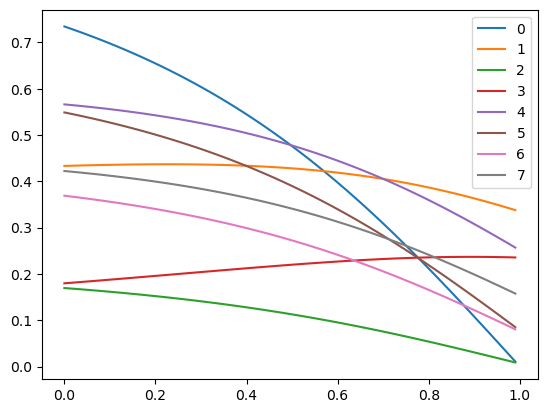

In [185]:
plt.plot(alphas_tilde, correlations)
plt.legend(not_included)
plt.show()

around 0.5

### b4)

Number 4

### b5)

$$ \textrm{Cor}(Y - \tilde\alpha\hat Y, X_i) = ... \cdot\textrm{Cor}(Y, X_i) - ... \cdot \tilde\alpha \cdot \textrm{Cor}(\tilde\alpha\hat Y, X_i) $$

In our case, $i=0$, $j=4$:
$$ |\textrm{Cor}(Y - \tilde\alpha\hat Y, X_i)| = |\textrm{Cor}(Y - \tilde\alpha\hat Y, X_j)|$$

In [186]:
# plot

In [187]:
next_var = 4
Xi = X[:,selected_variables[0]]
Xj = X[:,next_var]
nom = np.sqrt(np.var(Y)) * np.corrcoef(Y, Xi)[0][1] - np.sqrt(np.var(Y)) * np.corrcoef(Y, Xj)[0][1]
denom = np.sqrt(np.var(Y_hat)) * np.corrcoef(Y_hat, Xi)[0][1] - np.sqrt(np.var(Y_hat)) * np.corrcoef(Y_hat, Xj)[0][1]
nom/denom

0.4967289013871947

In [188]:
alpha2 = nom/denom
r1_alp2 = Y - Y_hat * alpha2

### b6)

In [189]:
selected_variables.append(4)
selected_variables

[0, 4]

### b7)

In [190]:
mod2 = LinearRegression(fit_intercept=False)
mod2.fit(X[:,selected_variables], Y)

LinearRegression(fit_intercept=False)

In [191]:
X[:,selected_variables] @ mod2.coef_

array([-1.12205758, -1.33590598, -1.08645716, -1.44412206, -0.4351387 ,
       -1.36458009, -0.44249277, -0.46520554, -1.22356036, -0.70772806,
       -0.6914747 , -1.51796229,  0.00966162, -0.06071127, -0.20058784,
       -0.02763024, -1.03727698,  0.35799157, -1.11292457, -0.72879226,
       -0.2308092 ,  0.23969963, -1.10395041,  0.09649392, -0.62407451,
       -0.07625826, -0.55825274, -1.02951741, -0.28608623,  0.42050926,
       -0.67571771, -0.72879226, -0.16478148, -0.81773605, -0.82805642,
       -0.14776891, -0.08854458, -0.58683859,  1.13340562, -0.41135563,
       -0.50265212, -0.07869223, -0.52244638,  0.09125528, -0.05602031,
        0.03571771,  1.16792313, -0.22268302,  0.07792117, -0.19292052,
       -0.25943651,  0.03375945, -0.55825274,  0.27468539,  0.80438652,
       -0.16912373, -0.31999632, -0.58358305, -0.54303036, -0.27526062,
       -0.58683859,  0.79101761,  0.60939914,  0.81025824,  0.24688912,
       -0.07022308,  0.22093387,  0.31147348, -1.0531552 , -0.20

### b8)

In [192]:
Y_hat = mod2.predict(X[:,selected_variables])
resids2 = [r1_alp2 - alp * Y_hat for alp in alphas_tilde]

In [193]:
X = np.c_[ X, X[:,selected_variables] @ mod2.coef_]

In [194]:
not_included = set(range(9))
correlations = [[np.corrcoef(res, X[:,i])[0][1] for i in not_included] for res in resids2]

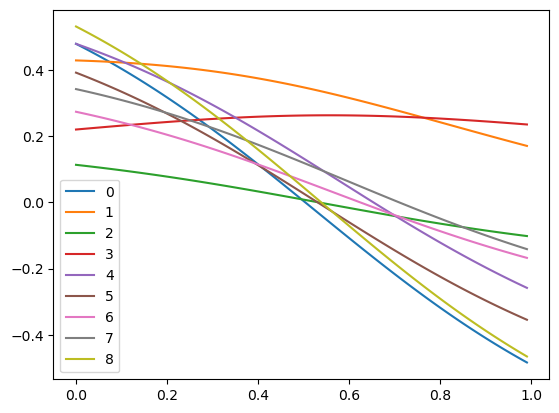

In [195]:
plt.plot(alphas_tilde, correlations)
plt.legend(not_included)
plt.show()

### b9)

1, with alpha = 0.1

### b10)

In [197]:
next_var = 1
Xi = X[:,selected_variables[0]]
Xj = X[:,next_var]
Y2 = r1_alp2
nom = np.sqrt(np.var(Y2)) * np.corrcoef(Y2, Xi)[0][1] - np.sqrt(np.var(Y2)) * np.corrcoef(Y2, Xj)[0][1]
denom = np.sqrt(np.var(Y_hat)) * np.corrcoef(Y_hat, Xi)[0][1] - np.sqrt(np.var(Y_hat)) * np.corrcoef(Y_hat, Xj)[0][1]
nom/denom

0.07329214163010271

### b11)

In [198]:
alpha3 = nom/denom
r1_alp3 = Y2 - Y_hat * alpha3

### c)

## Task 2

In [ ]:
X = pd.read_table("data/SRBCT_X.txt", sep=" ")
Y = pd.read_table("data/SRBCT_Y.txt", sep=" ")

X = np.array(X)
Y = np.array(Y)[:,0]

In [ ]:
X = scale(X)
Y = Y - np.mean(Y)

### a)

In [ ]:
mod_lars = Lars(n_nonzero_coefs=80)
# fit

In [ ]:
# plot

In [ ]:
# the order

### b)

In [ ]:
mod_lassolars = LassoLars(alpha=0.15)
# fit

In [ ]:
# order

In [ ]:
# plot

### c)

In [ ]:
lasso_coef = np.zeros((X.shape[1], mod_lassolars.alphas_.shape[0]))

In [ ]:
for i in range(mod_lassolars.alphas_.shape[0]):
    mod_lasso = Lasso(alpha=mod_lassolars.alphas_[i])
    mod_lasso.fit(X, Y)

    lasso_coef[:,i] = mod_lasso.coef_

In [ ]:
# plot